code for buy and hold strategy by using alpaca market api

In [93]:
# First, let's get the required data or setup for the buy and hold strategy
# install alpaca markeyt
!pip install alpaca-py pandas


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


here we wil use dotenv to accese my api keys stored in env file 

In [94]:
!pip install python-dotenv



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [95]:
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Access them like normal environment variables
api_key = os.getenv("ALPACA_API_KEY")
secret_key = os.getenv("ALPACA_SECRET_KEY")




lets get market data for the stocj that we select 

In [96]:
# we wil now pull the data and explain the formate to be pulled in the symbol , date and close price thts it 
client = StockHistoricalDataClient(api_key,secret_key)#access api 

# Define U.S. stock symbols
symbols = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA"]

end_date = datetime(2025,8,24)
start_date= datetime(2022,1,3)

#this is an function in alpaca market that lets you get the data have various inputs and you can match the data that you want 
request = StockBarsRequest(
     symbol_or_symbols=symbols,
     timeframe=TimeFrame.Day,
     start=start_date,
     end=end_date
)

bars = client.get_stock_bars(request)#methord to get our data from alpaca bars = price to siplify 




In [97]:
bars.df

open    high     low   close       volume  \
symbol timestamp                                                                
AAPL   2022-01-03 05:00:00+00:00  177.83  182.88  177.71  182.01  112486091.0   
       2022-01-04 05:00:00+00:00  182.64  182.94  179.12  179.70  106090378.0   
       2022-01-05 05:00:00+00:00  179.61  180.17  174.64  174.92   95142198.0   
       2022-01-06 05:00:00+00:00  172.70  175.30  171.64  172.00  103899632.0   
       2022-01-07 05:00:00+00:00  172.89  174.14  171.03  172.17   94554334.0   
...                                  ...     ...     ...     ...          ...   
TSLA   2025-08-18 04:00:00+00:00  329.62  336.27  329.59  335.16   56956552.0   
       2025-08-19 04:00:00+00:00  335.79  340.55  327.85  329.31   75956002.0   
       2025-08-20 04:00:00+00:00  329.22  331.37  314.60  323.90   77481768.0   
       2025-08-21 04:00:00+00:00  322.08  324.90  318.68  320.11   55744445.0   
       2025-08-22 04:00:00+00:00  321.66  340.25  319.69  340.01   94016347.0   

                                  trade_count        vwap  
symbol timestamp                                           
AAPL   2022-01-03 05:00:00+00:00     772699.0  181.395005  
       2022-01-04 05:00:00+00:00     831898.0  180.596889  
       2022-01-05 05:00:00+00:00     848518.0  177.382297  
       2022-01-06 05:00:00+00:00     960344.0  173.031383  
       2022-01-07 05:00:00+00:00     715419.0  172.441994  
...                                       ...         ...  
TSLA   2025-08-18 04:00:00+00:00     778455.0  333.750920  
       2025-08-19 04:00:00+00:00    1023971.0  333.066409  
       2025-08-20 04:00:00+00:00    1123164.0  321.289171  
       2025-08-21 04:00:00+00:00     735268.0  321.654800  
       2025-08-22 04:00:00+00:00    1266653.0  335.139049  

[4565 rows x 7 columns]

In [ ]:
current_df= bars.df
# Resample to monthly, taking the last close of each month
monthly_df = current_df.groupby('symbol').resample('M', level='timestamp').last()

# Pivot to get clean_df: symbols as columns, dates as index
clean_df = monthly_df['close'].unstack('symbol')
clean_df.index.name = 'date'

print(clean_df.head())


In [ ]:
# lets see our clean df 
clean_df

symbol,AAPL,AMZN,GOOGL,MSFT,TSLA
date,,,,,
2022-02-01 05:00:00+00:00,165.12,3071.26,2701.14,298.79,870.43
2022-03-01 05:00:00+00:00,174.61,3259.95,2781.35,308.31,1077.60
2022-04-01 04:00:00+00:00,157.65,2485.63,2282.19,277.52,870.76
2022-05-01 04:00:00+00:00,148.84,2404.19,2275.24,271.87,758.26
2022-06-01 04:00:00+00:00,136.72,106.21,2179.26,256.83,673.42
2022-07-01 04:00:00+00:00,162.51,134.95,116.32,280.74,891.45
2022-08-01 04:00:00+00:00,157.22,126.77,108.22,261.47,275.61
2022-09-01 04:00:00+00:00,138.20,113.00,95.65,232.90,265.25
2022-10-01 04:00:00+00:00,153.34,102.44,94.51,232.13,227.54


In [ ]:
# now we will work no te strategy 
initinal_invesment = 10000
total_invesmetn = initinal_invesment * clean_df.columns.size

In [ ]:
#total stock bought of eachcompany 
first_day_price = clean_df.iloc[0]

In [ ]:
stock_bought= initinal_invesment/first_day_price

In [ ]:
stock_bought

symbol
AAPL     60.562016
AMZN      3.255993
GOOGL     3.702141
MSFT     33.468322
TSLA     11.488575
Name: 2022-02-01 05:00:00+00:00, dtype: float64

In [ ]:
current_value = clean_df * stock_bought

In [ ]:
current_value

symbol,AAPL,AMZN,GOOGL,MSFT,TSLA
date,,,,,
2022-02-01 05:00:00+00:00,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
2022-03-01 05:00:00+00:00,10574.733527,10614.373254,10296.948696,10318.618428,12380.088002
2022-04-01 04:00:00+00:00,9547.601744,8093.193022,8448.988205,9288.128786,10003.791230
2022-05-01 04:00:00+00:00,9014.050388,7828.024980,8423.258328,9099.032765,8711.326586
2022-06-01 04:00:00+00:00,8280.038760,345.818980,8067.926875,8595.669199,7736.635916
2022-07-01 04:00:00+00:00,9841.933140,439.396209,430.632992,9395.896784,10241.489838
2022-08-01 04:00:00+00:00,9521.560078,412.762189,400.645653,8750.962214,3166.366049
2022-09-01 04:00:00+00:00,8369.670543,367.927170,354.109746,7794.772248,3047.344416
2022-10-01 04:00:00+00:00,9286.579457,333.543888,349.889306,7769.001640,2614.110267


In [ ]:
#lets take the final value ofall the stocks 

final_value = current_value.iloc[-1]

In [ ]:
final_value

symbol
AAPL     13793.604651
AMZN       745.101359
GOOGL      762.974152
MSFT     16976.137086
TSLA      3906.230254
Name: 2025-08-01 04:00:00+00:00, dtype: float64

In [ ]:
Profit_Loss =  final_value -initinal_invesment 

In [ ]:
Profit_Loss


symbol
AAPL     3793.604651
AMZN    -9254.898641
GOOGL   -9237.025848
MSFT     6976.137086
TSLA    -6093.769746
Name: 2025-08-01 04:00:00+00:00, dtype: float64

In [ ]:
total_PL =  Profit_Loss.sum()-total_invesmetn 

In [ ]:
total_PL

-63815.95249787114

In [ ]:
#LETS PLOT THE GRAPH TO SEE WHERE THING S WENT WRONG IN THE MARKET AND OUR MONTHLY RETURNS 
import matplotlib.pyplot as plt 

<function matplotlib.pyplot.show(close=None, block=None)>

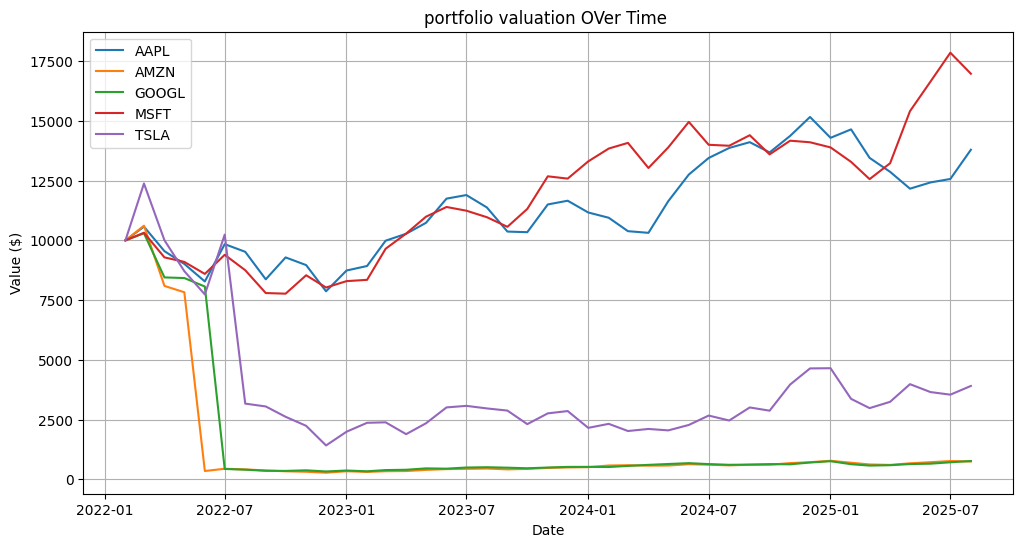

In [ ]:
plt.figure(figsize=(12,6))
for stock in current_value.columns:
    plt.plot(current_value.index,current_value[stock],label=stock)

plt.title("portfolio valuation OVer Time ")
plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.legend()
plt.grid(True)
plt.show


In [ ]:
current_value['tota_portfolio'] = current_value.sum(axis=1)

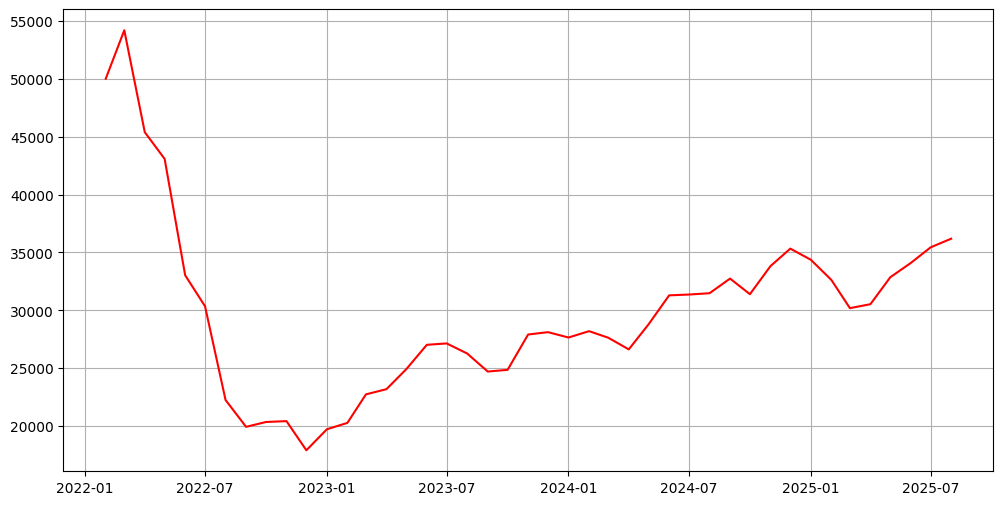

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(current_value.index,current_value['tota_portfolio'], label='Total Portfolio',color='red')
plt.grid(True)
